# **Práctica 3 Equipo 3**

## **Integrantes:**

* Hugo Martínez Ocampo  
* Carlos Armando López Encino  
* Brenda Adriana González Chávez  
* Ariadna Jaqueline Cordero Portocarrero  
* Javier Roberto Uribe Sandoval

**Librerías**

In [1]:
import pandas as pd
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.graph_objects as go
import plotly.express as px


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
ls '/content/drive/MyDrive/Semana3/Datos_p3' # Ruta donde se guardan todos los archivos

CTG.csv


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Semana3/Datos_p3/CTG.csv')

In [5]:
df.head()

FileName       Date      SegFile      b       e    LBE     LB   AC  \
0  Variab10.txt  12/1/1996  CTG0001.txt  240.0   357.0  120.0  120.0  0.0   
1    Fmcs_1.txt   5/3/1996  CTG0002.txt    5.0   632.0  132.0  132.0  4.0   
2    Fmcs_1.txt   5/3/1996  CTG0003.txt  177.0   779.0  133.0  133.0  2.0   
3    Fmcs_1.txt   5/3/1996  CTG0004.txt  411.0  1192.0  134.0  134.0  2.0   
4    Fmcs_1.txt   5/3/1996  CTG0005.txt  533.0  1147.0  132.0  132.0  4.0   

    FM   UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
1  0.0  4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
2  0.0  5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3  0.0  6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4  0.0  5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  

[5 rows x 40 columns]

In [6]:
df.describe()

b            e          LBE           LB           AC  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    878.439793  1702.877234   133.303857   133.303857     2.722484   
std     894.084748   930.919143     9.840844     9.840844     3.560850   
min       0.000000   287.000000   106.000000   106.000000     0.000000   
25%      55.000000  1009.000000   126.000000   126.000000     0.000000   
50%     538.000000  1241.000000   133.000000   133.000000     1.000000   
75%    1521.000000  2434.750000   140.000000   140.000000     4.000000   
max    3296.000000  3599.000000   160.000000   160.000000    26.000000   

                FM           UC         ASTV         MSTV         ALTV  ...  \
count  2127.000000  2127.000000  2127.000000  2127.000000  2127.000000  ...   
mean      7.503056     3.669017    47.008933     1.335449     9.884814  ...   
std      39.030452     2.877148    17.210648     0.891543    18.476534  ...   
min       0.000000     0.000000    12.000000     0.200000     0.000000  ...   
25%       0.000000     1.000000    32.000000     0.700000     0.000000  ...   
50%       0.000000     3.000000    49.000000     1.200000     0.000000  ...   
75%       2.000000     5.000000    61.000000     1.700000    11.000000  ...   
max     564.000000    23.000000    87.000000     7.000000    91.000000  ...   

                 C            D            E           AD           DE  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.024929     0.038100     0.033866     0.156162     0.118532   
std       0.155947     0.191482     0.180928     0.363094     0.323314   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                LD           FS         SUSP        CLASS          NSP  
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000  
mean      0.050329     0.032455     0.092662     4.509878     1.304327  
std       0.218675     0.177248     0.290027     3.026883     0.614377  
min       0.000000     0.000000     0.000000     1.000000     1.000000  
25%       0.000000     0.000000     0.000000     2.000000     1.000000  
50%       0.000000     0.000000     0.000000     4.000000     1.000000  
75%       0.000000     0.000000     0.000000     7.000000     1.000000  
max       1.000000     1.000000     1.000000    10.000000     3.000000  

[8 rows x 37 columns]

In [7]:
df[df.isna().any(axis=1)]

FileName Date SegFile   b   e  LBE  LB  AC     FM    UC  ...   C   D   E  \
2126      NaN  NaN     NaN NaN NaN  NaN NaN NaN    NaN   NaN  ... NaN NaN NaN   
2127      NaN  NaN     NaN NaN NaN  NaN NaN NaN    NaN   NaN  ... NaN NaN NaN   
2128      NaN  NaN     NaN NaN NaN  NaN NaN NaN  564.0  23.0  ... NaN NaN NaN   

      AD  DE  LD  FS  SUSP  CLASS  NSP  
2126 NaN NaN NaN NaN   NaN    NaN  NaN  
2127 NaN NaN NaN NaN   NaN    NaN  NaN  
2128 NaN NaN NaN NaN   NaN    NaN  NaN  

[3 rows x 40 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

In [9]:
df.isnull().mean()*100

FileName    0.140911
Date        0.140911
SegFile     0.140911
b           0.140911
e           0.140911
LBE         0.140911
LB          0.140911
AC          0.140911
FM          0.093941
UC          0.093941
ASTV        0.093941
MSTV        0.093941
ALTV        0.093941
MLTV        0.093941
DL          0.046970
DS          0.046970
DP          0.046970
DR          0.046970
Width       0.140911
Min         0.140911
Max         0.140911
Nmax        0.140911
Nzeros      0.140911
Mode        0.140911
Mean        0.140911
Median      0.140911
Variance    0.140911
Tendency    0.140911
A           0.140911
B           0.140911
C           0.140911
D           0.140911
E           0.140911
AD          0.140911
DE          0.140911
LD          0.140911
FS          0.140911
SUSP        0.140911
CLASS       0.140911
NSP         0.140911
dtype: float64

# **Imputaciones de valores faltantes**

In [10]:
# Imputadores media y moda
from sklearn.impute import SimpleImputer
imputador_media = SimpleImputer(strategy='mean')
imputador_moda = SimpleImputer(strategy='most_frequent')

In [11]:
df.head(2)

FileName       Date      SegFile      b      e    LBE     LB   AC   FM  \
0  Variab10.txt  12/1/1996  CTG0001.txt  240.0  357.0  120.0  120.0  0.0  0.0   
1    Fmcs_1.txt   5/3/1996  CTG0002.txt    5.0  632.0  132.0  132.0  4.0  0.0   

    UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
1  4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  

[2 rows x 40 columns]

In [12]:
df.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

**Análisis de variables continuas**

In [13]:
df.select_dtypes(include='number')

b       e    LBE     LB   AC     FM    UC  ASTV  MSTV  ALTV  ...  \
0      240.0   357.0  120.0  120.0  0.0    0.0   0.0  73.0   0.5  43.0  ...   
1        5.0   632.0  132.0  132.0  4.0    0.0   4.0  17.0   2.1   0.0  ...   
2      177.0   779.0  133.0  133.0  2.0    0.0   5.0  16.0   2.1   0.0  ...   
3      411.0  1192.0  134.0  134.0  2.0    0.0   6.0  16.0   2.4   0.0  ...   
4      533.0  1147.0  132.0  132.0  4.0    0.0   5.0  16.0   2.4   0.0  ...   
...      ...     ...    ...    ...  ...    ...   ...   ...   ...   ...  ...   
2124  1576.0  3049.0  140.0  140.0  1.0    0.0   9.0  78.0   0.4  27.0  ...   
2125  2796.0  3415.0  142.0  142.0  1.0    1.0   5.0  74.0   0.4  36.0  ...   
2126     NaN     NaN    NaN    NaN  NaN    NaN   NaN   NaN   NaN   NaN  ...   
2127     NaN     NaN    NaN    NaN  NaN    NaN   NaN   NaN   NaN   NaN  ...   
2128     NaN     NaN    NaN    NaN  NaN  564.0  23.0  87.0   7.0  91.0  ...   

        C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0     0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3     0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  
...   ...  ...  ...  ...  ...  ...  ...   ...    ...  ...  
2124  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2125  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    1.0  1.0  
2126  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  
2127  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  
2128  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  

[2129 rows x 37 columns]

In [14]:
var_continuas = ['b',
 'e',
 'LBE',
 'LB',
 'AC',
 'FM',
 'UC',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'DL',
 'Width']

In [15]:
df[var_continuas] = imputador_media.fit_transform(df[var_continuas])

In [16]:
# Verificamos que imputamos las variables continuas
df[var_continuas].isnull().sum()

b        0
e        0
LBE      0
LB       0
AC       0
FM       0
UC       0
ASTV     0
MSTV     0
ALTV     0
MLTV     0
DL       0
Width    0
dtype: int64

**Análisis de Variables discretas**

In [17]:
df[[ 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency','NSP','CLASS','SUSP','FS','LD','DE','AD','E','D','C','B','A']]

Min    Max  Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency  \
0      62.0  126.0   2.0     0.0  120.0  137.0   121.0      73.0       1.0   
1      68.0  198.0   6.0     1.0  141.0  136.0   140.0      12.0       0.0   
2      68.0  198.0   5.0     1.0  141.0  135.0   138.0      13.0       0.0   
3      53.0  170.0  11.0     0.0  137.0  134.0   137.0      13.0       1.0   
4      53.0  170.0   9.0     0.0  137.0  136.0   138.0      11.0       1.0   
...     ...    ...   ...     ...    ...    ...     ...       ...       ...   
2124  103.0  169.0   6.0     0.0  152.0  147.0   151.0       4.0       1.0   
2125  117.0  159.0   2.0     1.0  145.0  143.0   145.0       1.0       0.0   
2126    NaN    NaN   NaN     NaN    NaN    NaN     NaN       NaN       NaN   
2127    NaN    NaN   NaN     NaN    NaN    NaN     NaN       NaN       NaN   
2128    NaN    NaN   NaN     NaN    NaN    NaN     NaN       NaN       NaN   

      NSP  ...  SUSP   FS   LD   DE   AD    E    D    C    B    A  
0     2.0  ...   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     1.0  ...   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2     1.0  ...   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
3     1.0  ...   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
4     1.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
...   ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2124  2.0  ...   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
2125  1.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2126  NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2127  NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2128  NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2129 rows x 21 columns]

In [18]:
df.select_dtypes(exclude='number').columns.tolist()

['FileName', 'Date', 'SegFile']

In [19]:
var_discretas = ['FileName',
 'Date',
 'SegFile',
 'DS',
 'DP',
 'DR',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency',
 'A',
 'B',
 'C',
 'D',
 'E',
 'AD',
 'DE',
 'LD',
 'FS',
 'SUSP',
 'CLASS',
 'NSP']

In [20]:
# Imputemos con la moda
df[var_discretas] = imputador_moda.fit_transform(df[var_discretas])

In [21]:
# Verificamos que se imputaron las variables discretas
df[var_discretas].isnull().sum()

FileName    0
Date        0
SegFile     0
DS          0
DP          0
DR          0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [22]:
df.isnull().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [23]:
len(var_continuas) + len(var_discretas) == len(df.columns)

True

# **Detectar y tratar valores atípicos (outliers) con z-score**

In [24]:
from scipy.stats import zscore

Z_scores = df[var_continuas].apply(zscore)
mask = (Z_scores > -3) & (Z_scores < 3)
df = df[mask.all(axis=1)].copy()

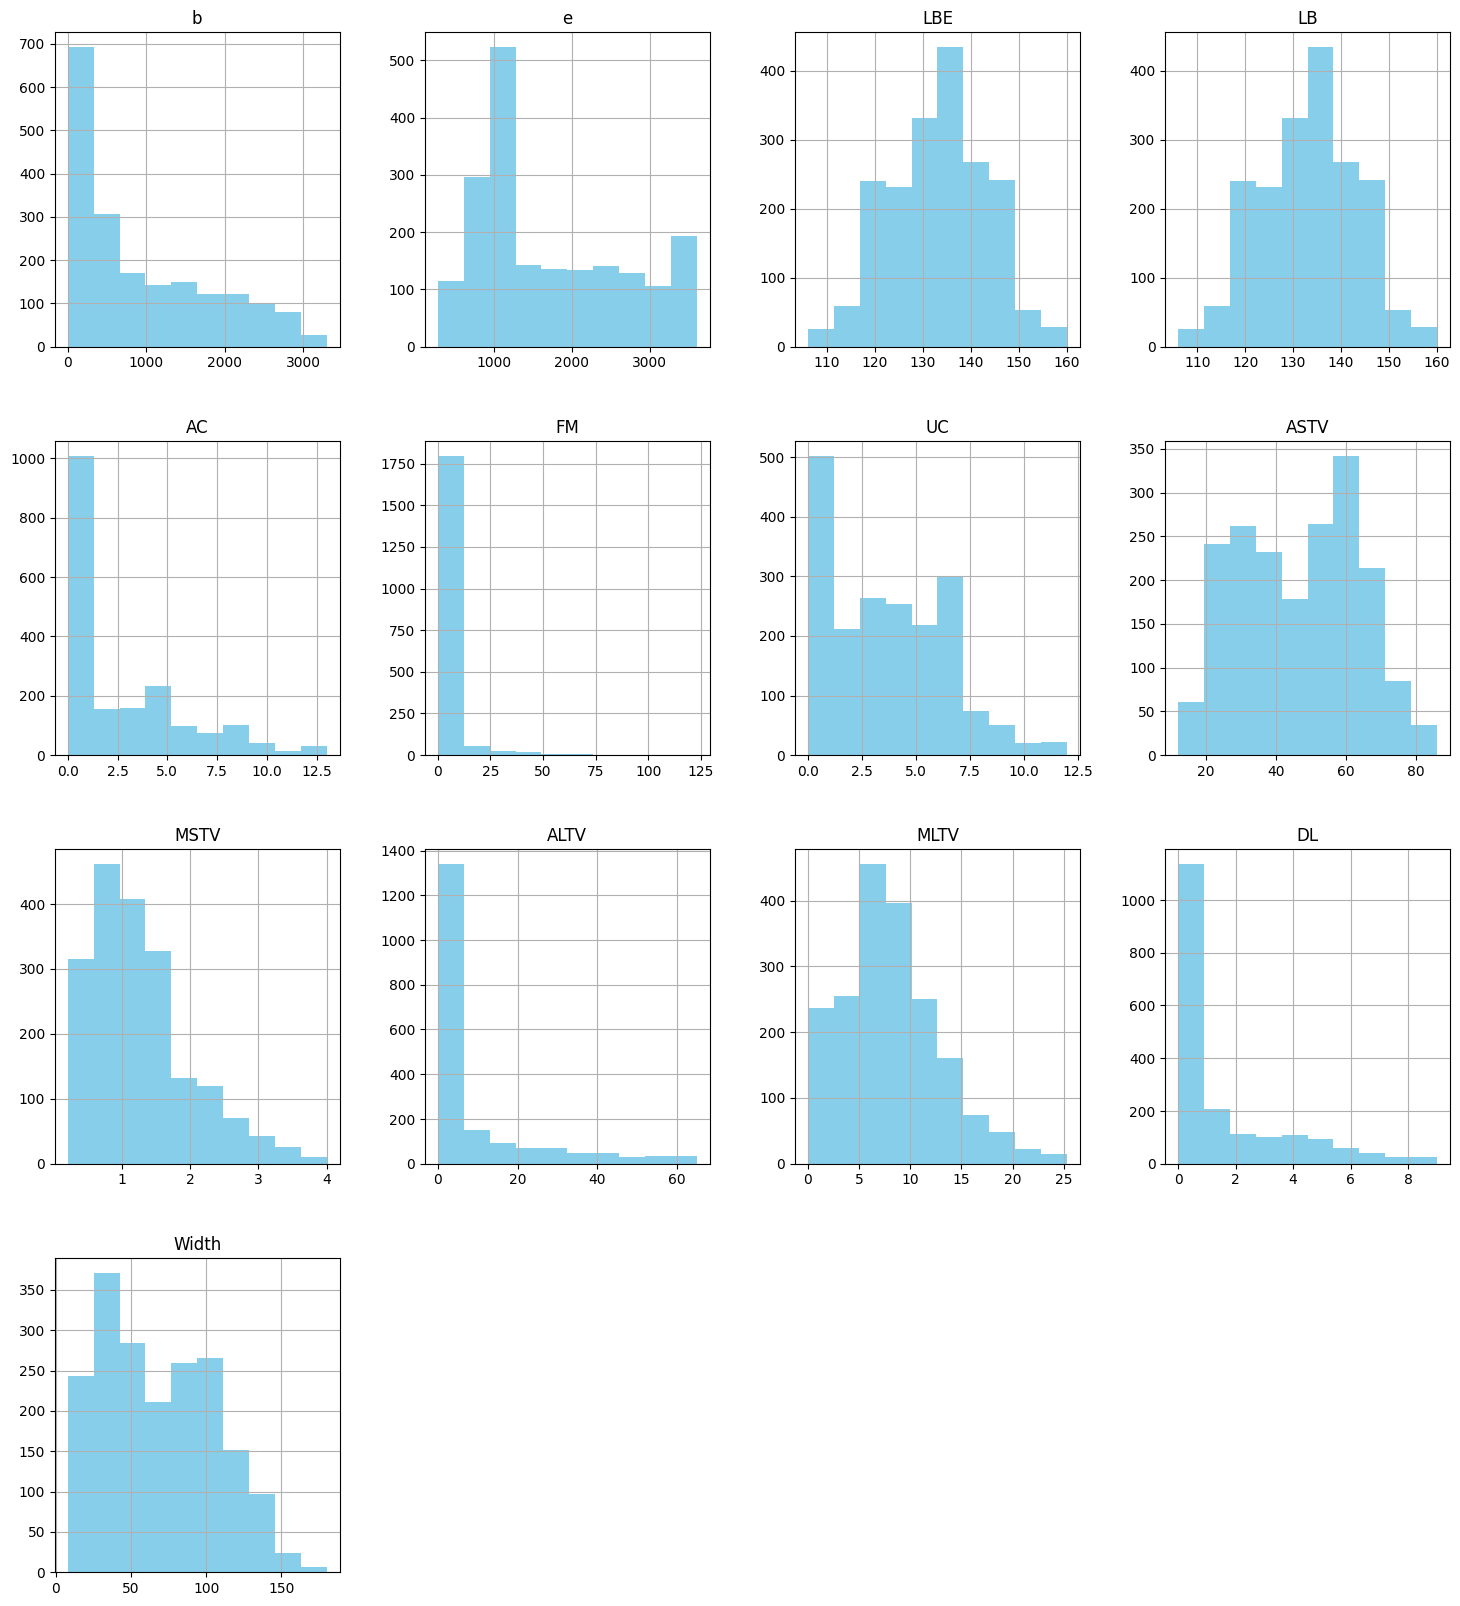

In [25]:
df.hist(figsize=(18,20), color='skyblue');

In [26]:
df

FileName       Date      SegFile            b            e  \
0     Variab10.txt  12/1/1996  CTG0001.txt   240.000000   357.000000   
1       Fmcs_1.txt   5/3/1996  CTG0002.txt     5.000000   632.000000   
2       Fmcs_1.txt   5/3/1996  CTG0003.txt   177.000000   779.000000   
3       Fmcs_1.txt   5/3/1996  CTG0004.txt   411.000000  1192.000000   
4       Fmcs_1.txt   5/3/1996  CTG0005.txt   533.000000  1147.000000   
...            ...        ...          ...          ...          ...   
2123  S8001045.dsp   6/6/1998  CTG2126.txt  1576.000000  2596.000000   
2124  S8001045.dsp   6/6/1998  CTG2127.txt  1576.000000  3049.000000   
2125  S8001045.dsp   6/6/1998  CTG2128.txt  2796.000000  3415.000000   
2126  S8001034.dsp  2/22/1995  CTG0001.txt   878.439793  1702.877234   
2127  S8001034.dsp  2/22/1995  CTG0001.txt   878.439793  1702.877234   

             LBE          LB        AC        FM        UC  ...    C    D  \
0     120.000000  120.000000  0.000000  0.000000  0.000000  ...  0.0  0.0   
1     132.000000  132.000000  4.000000  0.000000  4.000000  ...  0.0  0.0   
2     133.000000  133.000000  2.000000  0.000000  5.000000  ...  0.0  0.0   
3     134.000000  134.000000  2.000000  0.000000  6.000000  ...  0.0  0.0   
4     132.000000  132.000000  4.000000  0.000000  5.000000  ...  0.0  0.0   
...          ...         ...       ...       ...       ...  ...  ...  ...   
2123  140.000000  140.000000  1.000000  0.000000  7.000000  ...  0.0  0.0   
2124  140.000000  140.000000  1.000000  0.000000  9.000000  ...  0.0  0.0   
2125  142.000000  142.000000  1.000000  1.000000  5.000000  ...  0.0  0.0   
2126  133.303857  133.303857  2.722484  7.503056  3.669017  ...  0.0  0.0   
2127  133.303857  133.303857  2.722484  7.503056  3.669017  ...  0.0  0.0   

        E   AD   DE   LD   FS SUSP  CLASS  NSP  
0     0.0  0.0  0.0  0.0  1.0  0.0    9.0  2.0  
1     0.0  1.0  0.0  0.0  0.0  0.0    6.0  1.0  
2     0.0  1.0  0.0  0.0  0.0  0.0    6.0  1.0  
3     0.0  1.0  0.0  0.0  0.0  0.0    6.0  1.0  
4     0.0  0.0  0.0  0.0  0.0  0.0    2.0  1.0  
...   ...  ...  ...  ...  ...  ...    ...  ...  
2123  1.0  0.0  0.0  0.0  0.0  0.0    5.0  2.0  
2124  1.0  0.0  0.0  0.0  0.0  0.0    5.0  2.0  
2125  0.0  0.0  0.0  0.0  0.0  0.0    1.0  1.0  
2126  0.0  0.0  0.0  0.0  0.0  0.0    2.0  1.0  
2127  0.0  0.0  0.0  0.0  0.0  0.0    2.0  1.0  

[1913 rows x 40 columns]

# **Creación de la función general check_data_completeness_numeroequipo(df)**

In [27]:
def check_data_completeness_equipo3(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analyzes data completeness and dispersion statistics for each column in a given DataFrame.

    Returns a summary DataFrame containing:
    - Column name
    - Null value count
    - Completion percentage (non-null percentage)
    - Data type
    - Dispersion statistics for numeric columns (excluding known discrete columns):
        - Min
        - Max
        - Range
        - Variance
        - Standard Deviation
        - Interquartile Range (IQR)
        - Coefficient of Variation (CV)

    Parameters:
        df (pd.DataFrame): Input DataFrame to analyze.

    Returns:
        pd.DataFrame: Summary table with data completeness and dispersion stats per column.
    """
    from pandas.api.types import is_numeric_dtype

    continuous_columns=[]
    discrete_columns=[]
    for col in df.columns.tolist():
        if (len(set(df[col])) > 10) & (is_numeric_dtype(df[col])):
            continuous_columns.append(col)
        else:
            discrete_columns.append(col)



    # Null Counts
    null_df = df.isnull().sum().reset_index()
    new_df = pd.DataFrame()
    new_df['ColumnName'] = null_df['index']
    new_df['NullCount'] = null_df[0]

    # Completion percentage
    comp_df = pd.DataFrame()
    comp_df = (df.notnull().mean()*100).reset_index()
    comp_df.rename(columns={0:'CompletionPercentage', 'index': 'ColumnName'}, inplace=True)
    new_df = new_df.merge(comp_df, on='ColumnName')

    # DataType
    type_df = pd.DataFrame()
    type_df = df.dtypes.reset_index()
    type_df.rename(columns={0:'DataType', 'index': 'ColumnName'}, inplace=True)
    new_df = new_df.merge(type_df, on='ColumnName')

    # Dispersion Statistics
    stats_df = pd.DataFrame()
    stats_df = df.copy()
    stats_df.drop(columns=discrete_columns, inplace=True)
    dispersion_stats = pd.DataFrame({
        'Min': stats_df.min(),
        'Max': stats_df.max(),
        'Range': stats_df.max() - stats_df.min(),
        'Variance': stats_df.var(),
        'Standard Deviation': stats_df.std(),
        'IQR': stats_df.quantile(0.75) - stats_df.quantile(0.25)
    })
    dispersion_stats.reset_index(inplace=True)
    dispersion_stats.rename(columns={'index': 'ColumnName'}, inplace=True)
    new_df = new_df.merge(dispersion_stats, on='ColumnName', how='left')
    new_df.fillna('N/A', inplace=True)

    return new_df

In [28]:
check_data_completeness_equipo3(df)

/tmp/ipython-input-27-3614467441.py:70: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_df.fillna('N/A', inplace=True)


ColumnName  NullCount  CompletionPercentage DataType    Min     Max  \
0    FileName          0                 100.0   object    N/A     N/A   
1        Date          0                 100.0   object    N/A     N/A   
2     SegFile          0                 100.0   object    N/A     N/A   
3           b          0                 100.0  float64    0.0  3296.0   
4           e          0                 100.0  float64  287.0  3599.0   
5         LBE          0                 100.0  float64  106.0   160.0   
6          LB          0                 100.0  float64  106.0   160.0   
7          AC          0                 100.0  float64    0.0    13.0   
8          FM          0                 100.0  float64    0.0   123.0   
9          UC          0                 100.0  float64    0.0    12.0   
10       ASTV          0                 100.0  float64   12.0    86.0   
11       MSTV          0                 100.0  float64    0.2     4.0   
12       ALTV          0                 100.0  float64    0.0    65.0   
13       MLTV          0                 100.0  float64    0.0    25.3   
14         DL          0                 100.0  float64    0.0     9.0   
15         DS          0                 100.0   object    N/A     N/A   
16         DP          0                 100.0   object    N/A     N/A   
17         DR          0                 100.0   object    N/A     N/A   
18      Width          0                 100.0  float64    8.0   180.0   
19        Min          0                 100.0   object    N/A     N/A   
20        Max          0                 100.0   object    N/A     N/A   
21       Nmax          0                 100.0   object    N/A     N/A   
22     Nzeros          0                 100.0   object    N/A     N/A   
23       Mode          0                 100.0   object    N/A     N/A   
24       Mean          0                 100.0   object    N/A     N/A   
25     Median          0                 100.0   object    N/A     N/A   
26   Variance          0                 100.0   object    N/A     N/A   
27   Tendency          0                 100.0   object    N/A     N/A   
28          A          0                 100.0   object    N/A     N/A   
29          B          0                 100.0   object    N/A     N/A   
30          C          0                 100.0   object    N/A     N/A   
31          D          0                 100.0   object    N/A     N/A   
32          E          0                 100.0   object    N/A     N/A   
33         AD          0                 100.0   object    N/A     N/A   
34         DE          0                 100.0   object    N/A     N/A   
35         LD          0                 100.0   object    N/A     N/A   
36         FS          0                 100.0   object    N/A     N/A   
37       SUSP          0                 100.0   object    N/A     N/A   
38      CLASS          0                 100.0   object    N/A     N/A   
39        NSP          0                 100.0   object    N/A     N/A   

     Range       Variance Standard Deviation     IQR  
0      N/A            N/A                N/A     N/A  
1      N/A            N/A                N/A     N/A  
2      N/A            N/A                N/A     N/A  
3   3296.0  818755.495377          904.85109  1478.0  
4   3312.0  879052.678928         937.578092  1448.0  
5     54.0      99.080008           9.953894    15.0  
6     54.0      99.080008           9.953894    15.0  
7     13.0       9.908286           3.147743     4.0  
8    123.0     105.620004          10.277159     2.0  
9     12.0       7.173362           2.678313     4.0  
10    74.0     285.385876          16.893368    28.0  
11     3.8       0.538405           0.733761     0.9  
12    65.0      230.22787          15.173262    10.0  
13    25.3      23.849844            4.88363     5.9  
14     9.0       5.035368           2.243963     2.0  
15     N/A            N/A                N/A     N/A  
16     N/A            N/A        

# **Clasificación de columnas**

In [29]:
from pandas.api.types import is_numeric_dtype

continuous_columns=[]
discrete_columns=[]
for col in df.columns.tolist():
    if (len(set(df[col])) > 10) & (is_numeric_dtype(df[col])):
        continuous_columns.append(col)
    else:
        discrete_columns.append(col)

print(f'Continous columns: {continuous_columns}')
print(f'Discrete columns: {discrete_columns}')

Continous columns: ['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'Width']
Discrete columns: ['FileName', 'Date', 'SegFile', 'DS', 'DP', 'DR', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']


# **Visualización**

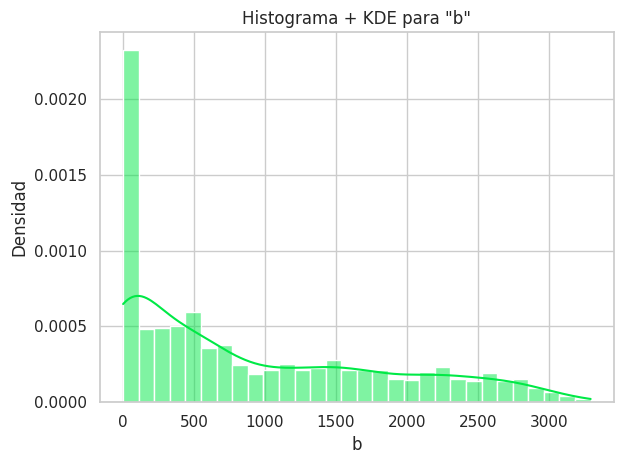

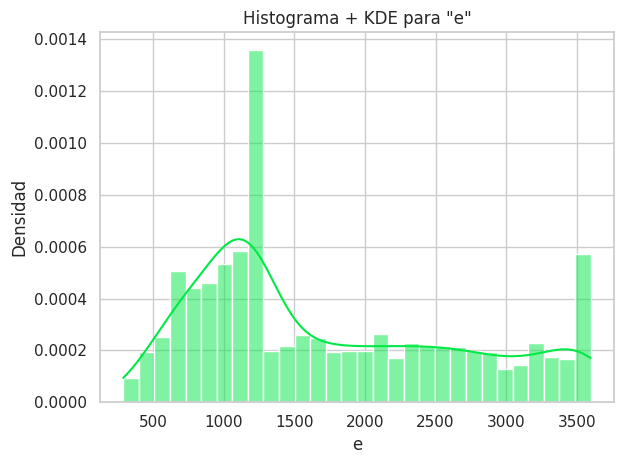

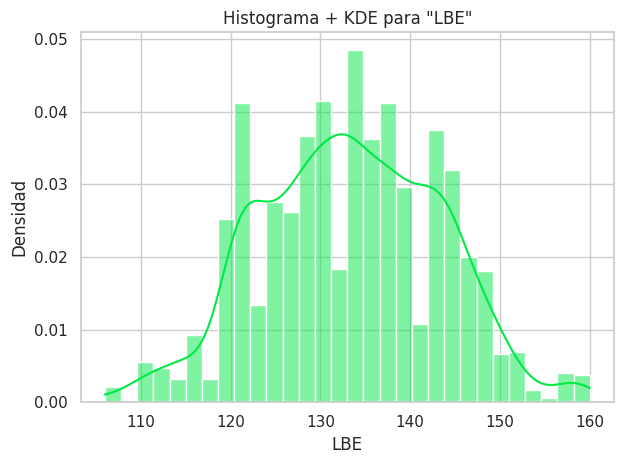

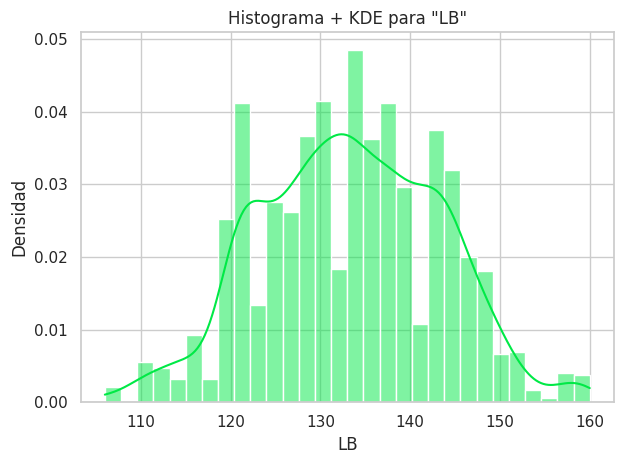

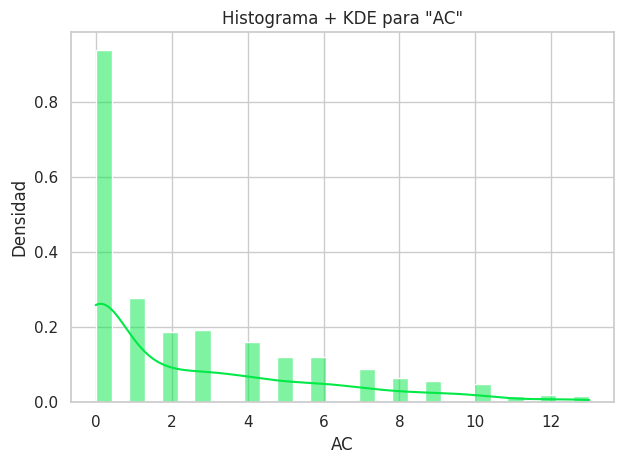

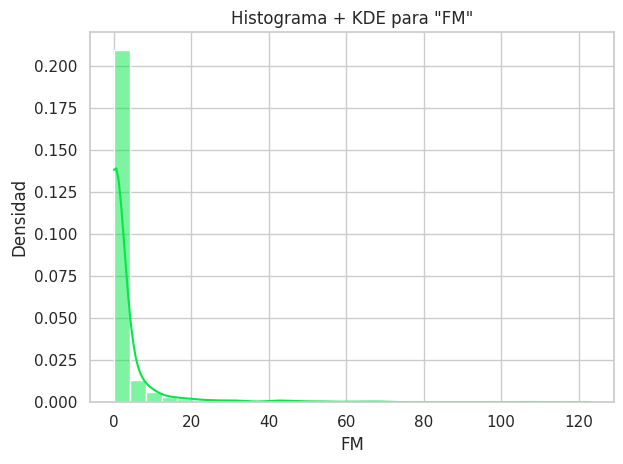

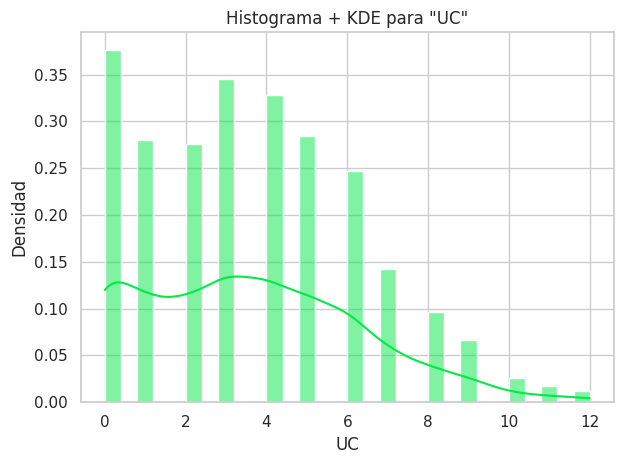

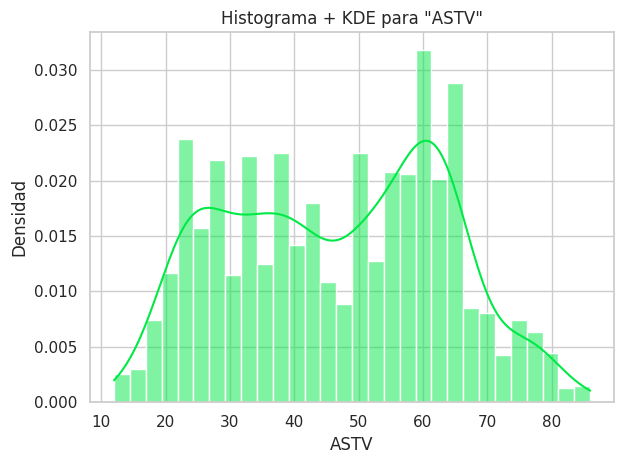

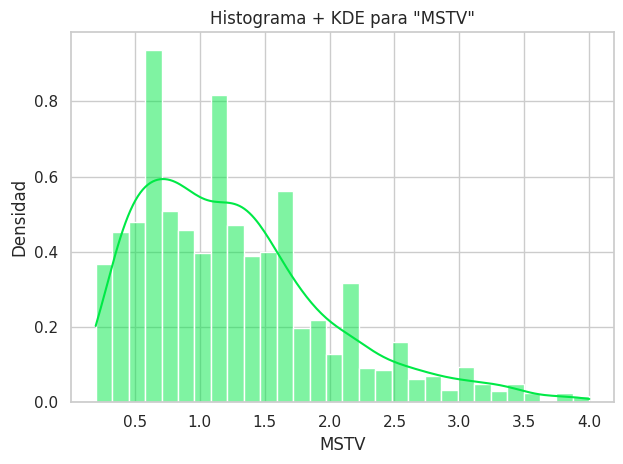

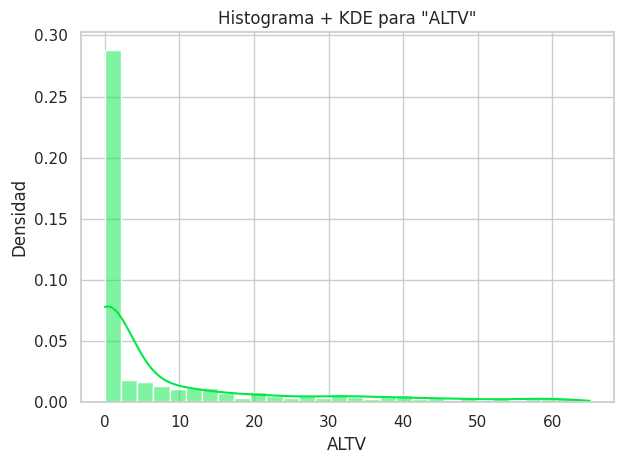

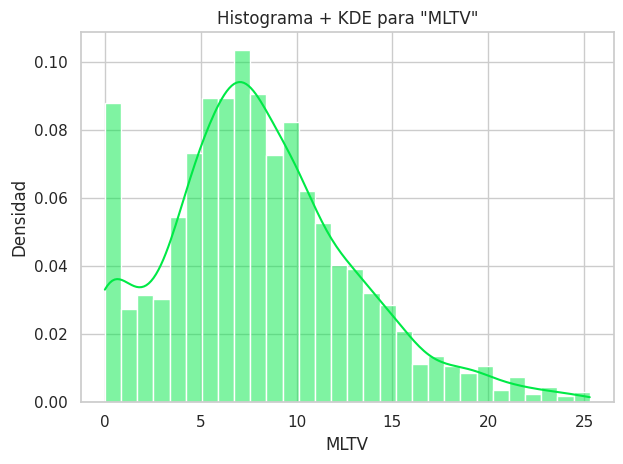

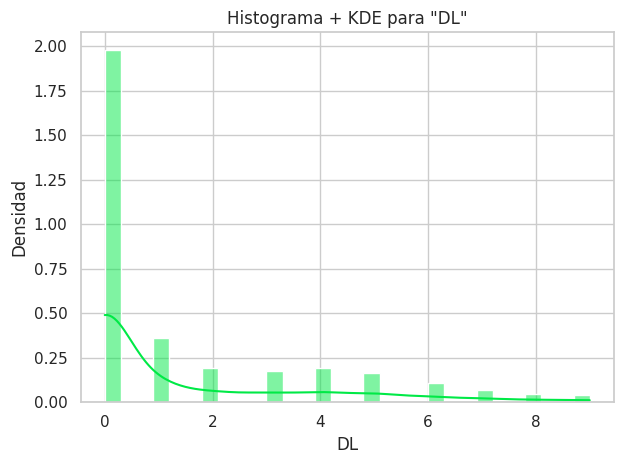

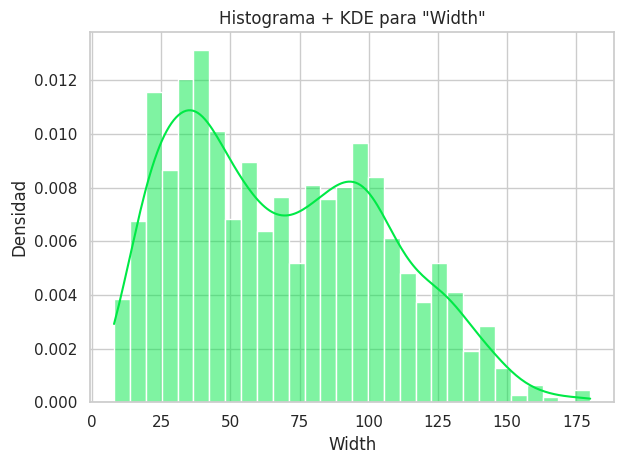

In [30]:
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def render_histogram(df: pd.DataFrame, column: str, bins: int = 30, color: str = "#00e946", return_fig: bool = False):
    """
    Render a histogram with KDE for a specified numeric column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to plot.
        bins (int): Number of bins for the histogram.
        color (str): Color of the histogram bars.
        return_fig (bool): If True, return the matplotlib Figure object.

    Returns:
        matplotlib.figure.Figure or None
    """
    sns.set_theme(style='whitegrid')
    fig, ax = plt.subplots()
    sns.histplot(df[column].dropna(), kde=True, stat='density', bins=bins, color=color, ax=ax)
    ax.set_title(f'Histograma + KDE para "{column}"')
    ax.set_xlabel(column)
    ax.set_ylabel("Densidad")
    plt.tight_layout()

    if return_fig:
        return fig
    else:
        plt.show()

for i in var_continuas:
    render_histogram(df, column=i, return_fig=True)

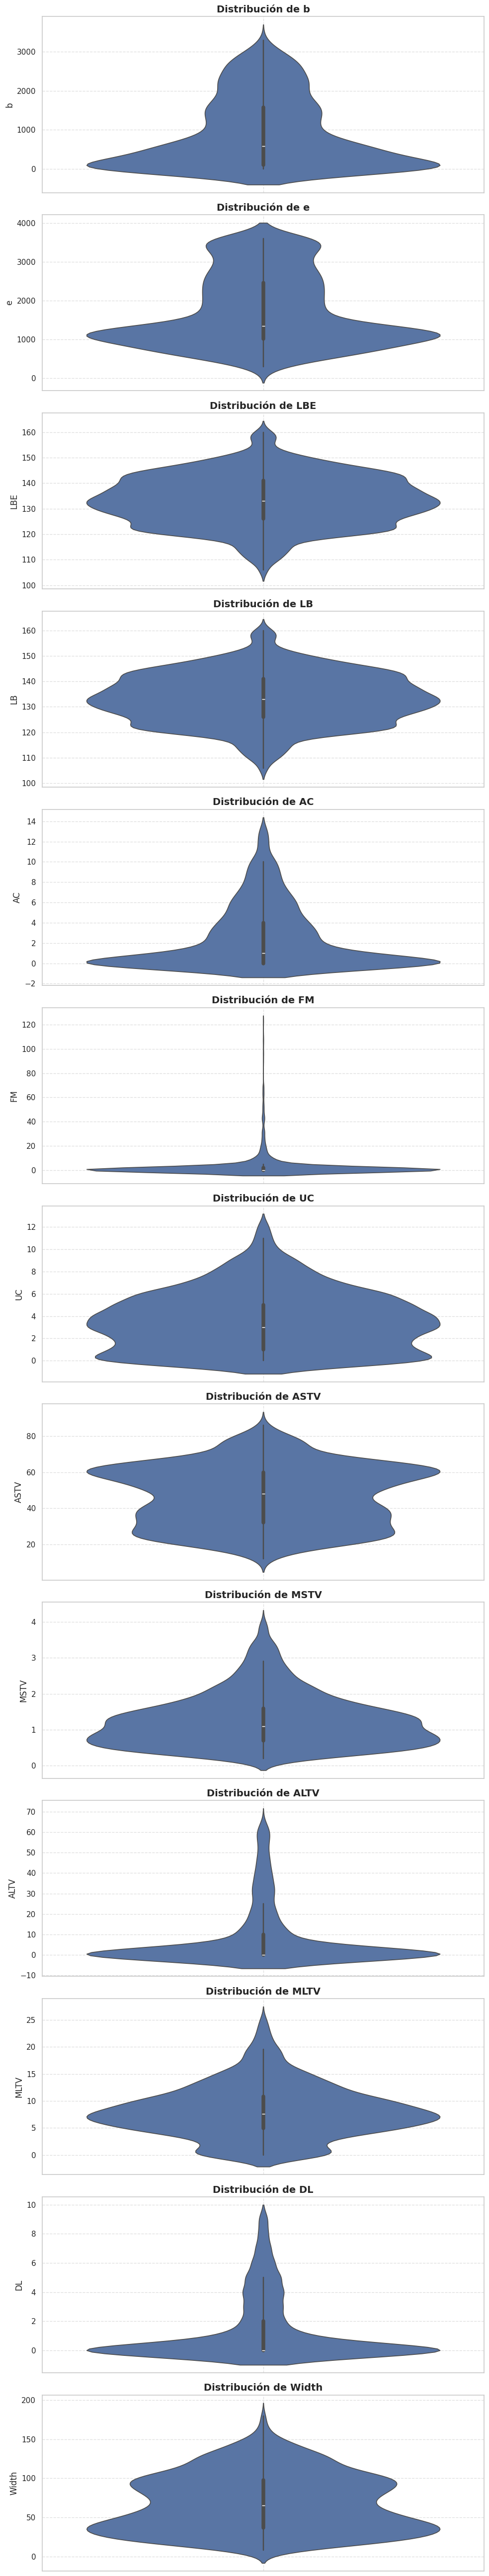

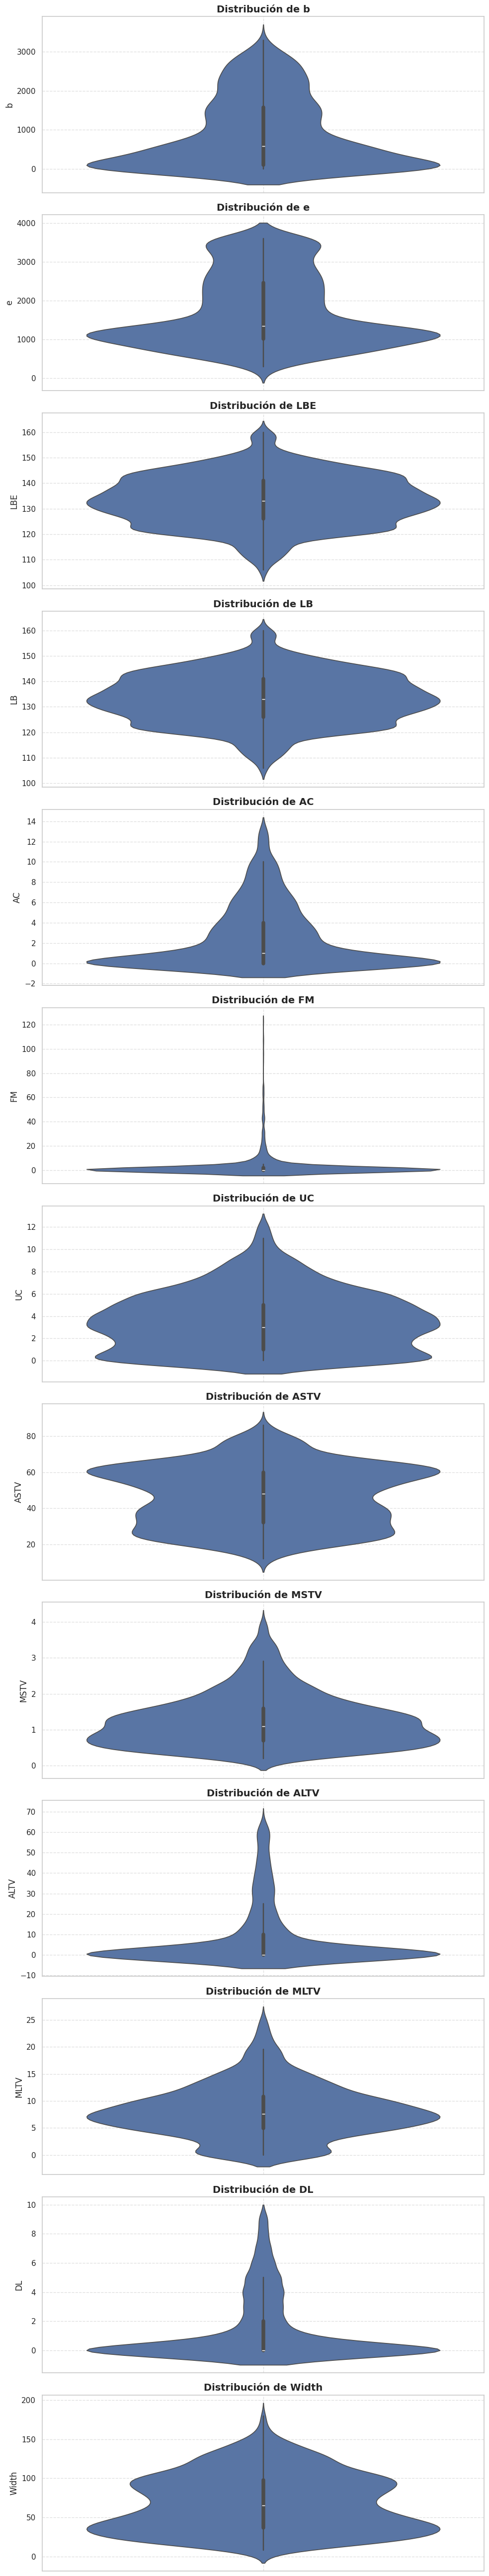

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def violin_seaborn(data: pd.DataFrame, numeric_columns: list, return_fig: bool, palette: str = 'Set2', hue: str = None)-> None:
    """
    EN:
    Draws a series of vertically stacked violin plots for all numeric columns in a DataFrame.

    Args:
        data (pd.DataFrame): The input DataFrame.
        hue (str, optional): Column name for categorical separation (x-axis).
        palette (str, optional): Seaborn color palette.
        numeric_columns(list): the list of continuous columns.
        return_fig (bool, optional): If True, returns the matplotlib figure (for use in Streamlit).

    Returns:
        matplotlib.figure.Figure or None

    ESP:
    Genera gráficos de violín para cada columna numérica de un DataFrame,
    opcionalmente separados por una variable categórica (`hue`).

    Args:
        data (pd.DataFrame): DataFrame con columnas numéricas y opcionalmente una categórica.
        hue (str, optional): Nombre de la columna categórica para comparar grupos. Defaults to None.
        palette (str, optional): Paleta de colores de seaborn (solo se aplica si se usa `hue`). Defaults to 'Set2'.
        numeric_columns(list): lista de columnas continuas.
        return_fig(booleano, opcional): Si es verdadero, regresa la figurat de matplotlib (para uso en Streamlit).

    Returns:
        La figura de matplotlib o None

    """
    plot_cols = [col for col in numeric_columns if col != hue]
    n_cols = len(plot_cols)

    height = max(4 * n_cols, 6)
    fig, axes = plt.subplots(n_rows := n_cols, 1, figsize=(10, height), squeeze=False)

    for i, col in enumerate(plot_cols):
        ax = axes[i][0]
        sns.violinplot(
            data=data, y=col, x=hue if hue else None,
            palette=palette if hue else None,
            inner='box', linewidth=1.2, ax=ax
        )
        ax.set_title(f'Distribución de {col}', fontsize=14, weight='bold')
        ax.set_xlabel(hue if hue else '')
        ax.set_ylabel(col, fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()

    if return_fig:
        return fig
    else:
        plt.show()
violin_seaborn(df, var_continuas, return_fig=True)

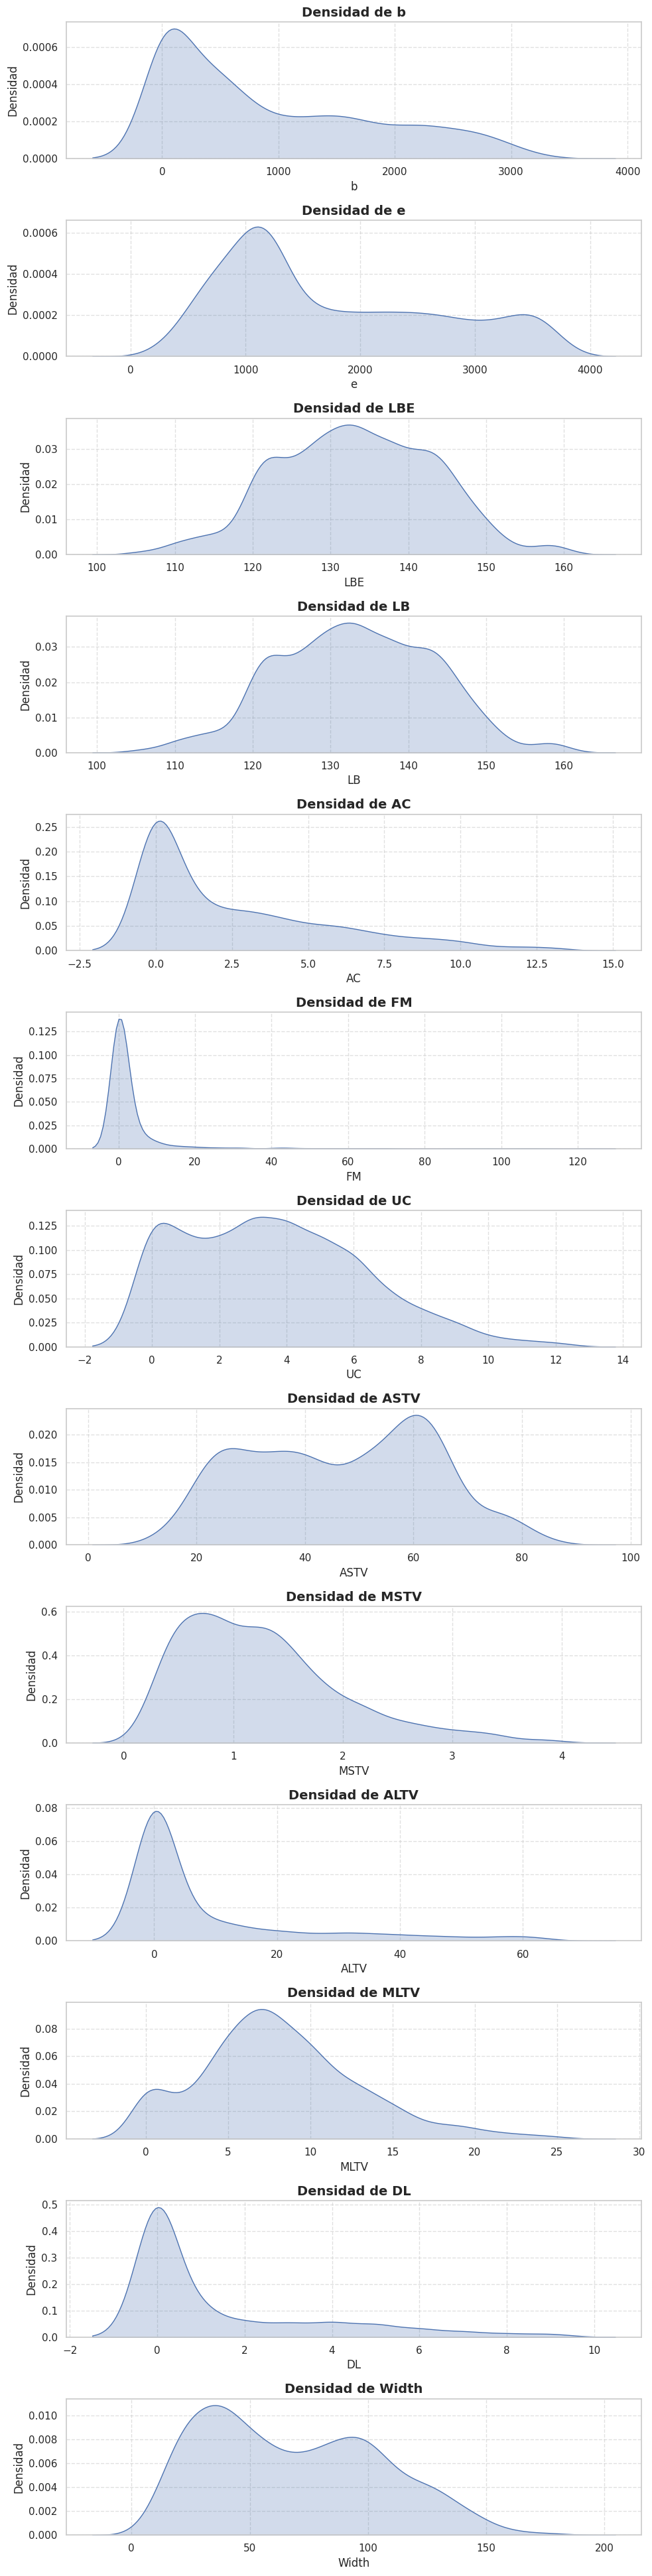

In [32]:
# Grafico de la función de densidad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def density_seaborn(data: pd.DataFrame) -> None:
    """
    Genera gráficos de densidad (KDE) para todas las columnas numéricas de un DataFrame.

    Args:
        data (pd.DataFrame): DataFrame con columnas numéricas para graficar.

    Returns:
        None. Muestra las gráficas directamente.
    """
    sns.set(style='whitegrid')
    n_cols = len(data.columns)
    height = max(3 * n_cols, 6)
    plt.figure(figsize=(10, height))

    for i, col in enumerate(data.columns):
        plt.subplot(n_cols, 1, i + 1)
        sns.kdeplot(data=data, x=col, fill=True)
        plt.title(f'Densidad de {col}', fontsize=14, weight='bold')
        plt.xlabel(col)
        plt.ylabel('Densidad')
        plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()
density_seaborn(df[var_continuas])

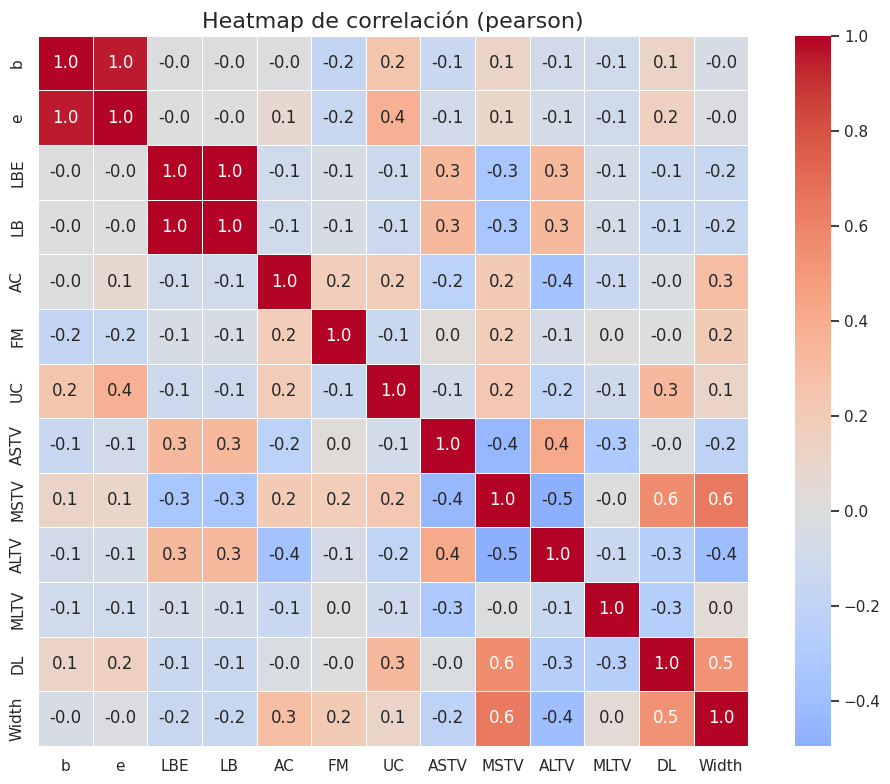

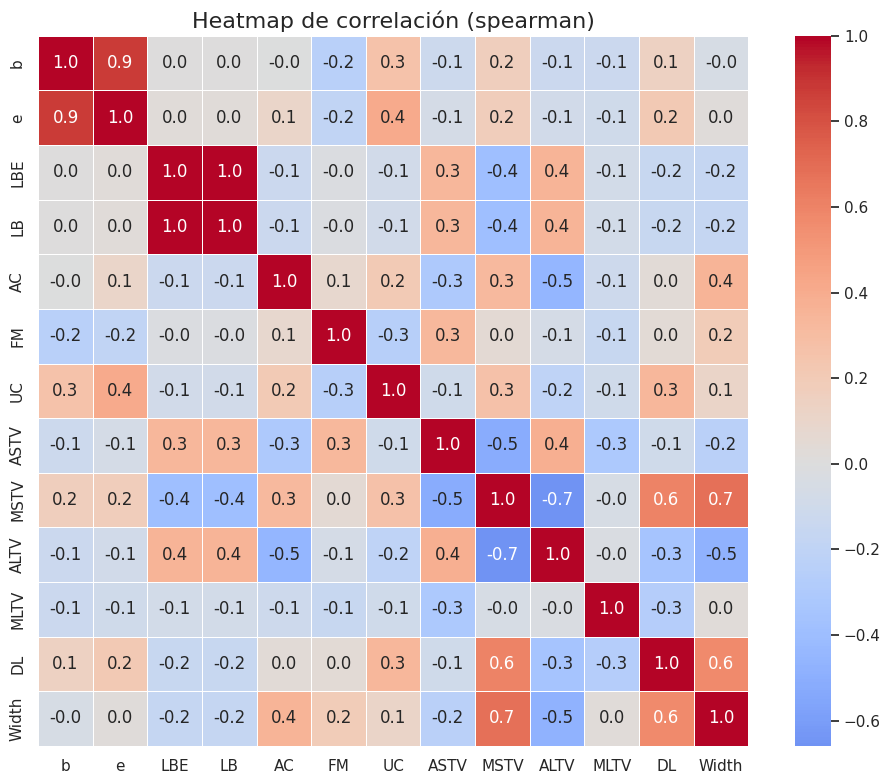

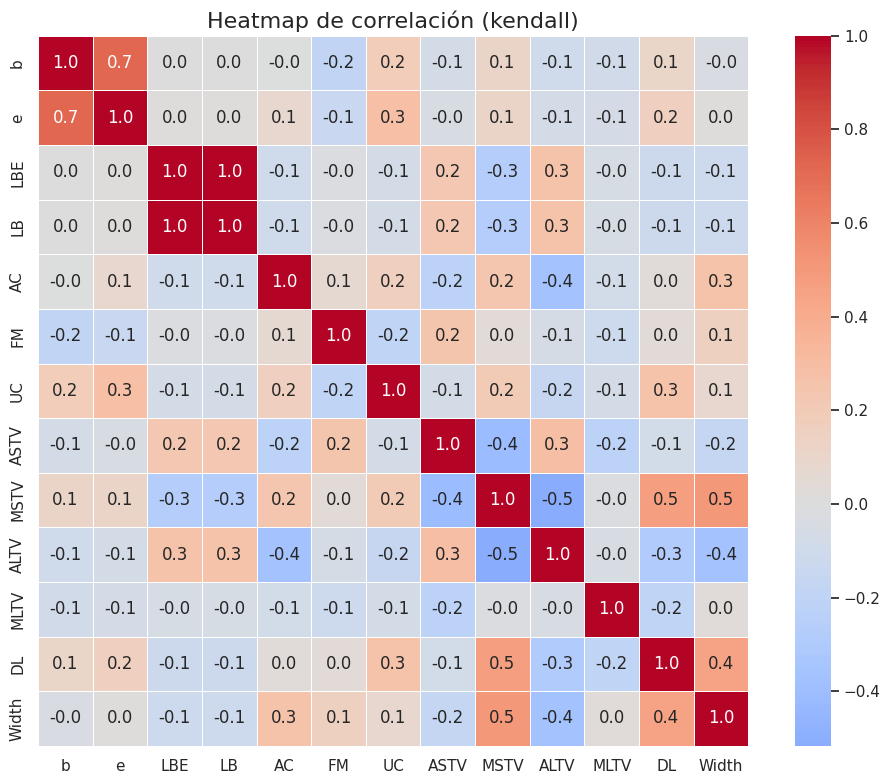

In [33]:
# heatmap_module.py
from typing import Literal
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def calculate_correlation_matrix(
    data: pd.DataFrame,
    method: Literal['pearson', 'spearman', 'kendall'] = 'pearson'
) -> pd.DataFrame:
    """
    Calcula la matriz de correlación de un DataFrame según el método especificado.

    Args:
        data (pd.DataFrame): DataFrame con variables numéricas.
        method (str): Método de correlación ('pearson', 'spearman', 'kendall').

    Returns:
        pd.DataFrame: Matriz de correlación.
    """
    return data.corr(method=method)


def plot_heatmap(
    corr_matrix: pd.DataFrame,
    method: Literal['pearson', 'spearman', 'kendall'] = 'pearson',
    figsize: tuple[int, int] = (10, 8),
    annot_format: str = ".1f"
) -> None:
    """
    Grafica un heatmap de correlación usando seaborn.

    Args:
        corr_matrix (pd.DataFrame): Matriz de correlación.
        method (str): Método de correlación usado para el título.
        figsize (tuple): Tamaño de la figura (ancho, alto).
        annot_format (str): Formato para anotaciones dentro del heatmap.

    Returns:
        None
    """
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=annot_format,
        cmap='coolwarm',
        center=0,
        square=True,
        linewidths=0.5
    )
    plt.title(f"Heatmap de correlación ({method})", fontsize=16)
    plt.tight_layout()
    plt.show()

corr_p = calculate_correlation_matrix(df[var_continuas], method='pearson')
corr_s = calculate_correlation_matrix(df[var_continuas], method='spearman')
corr_k = calculate_correlation_matrix(df[var_continuas], method='kendall')
plot_heatmap(corr_p, method='pearson', figsize=(10, 8))
plot_heatmap(corr_s, method='spearman', figsize=(10, 8))
plot_heatmap(corr_k, method='kendall', figsize=(10, 8))

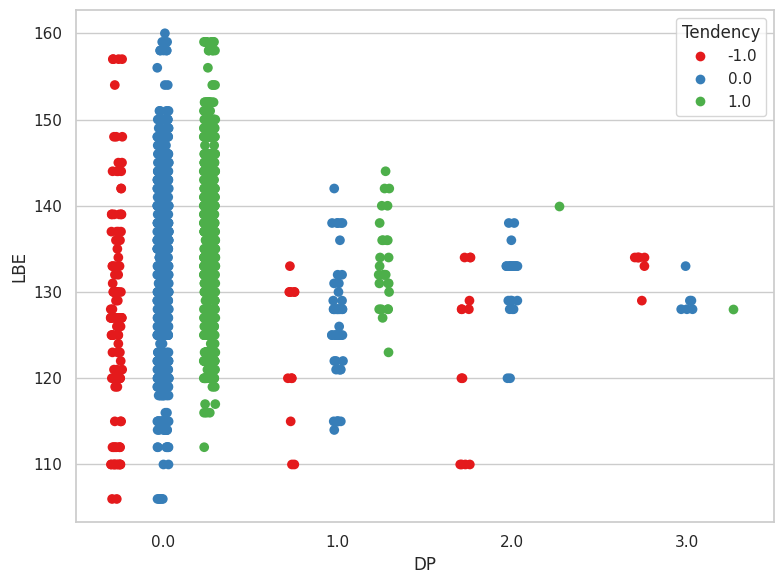

In [34]:
# dotplot_module.py
from typing import Optional
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def create_dotplot(
    data: pd.DataFrame,
    x: str,
    y: str,
    group: str,
    dodge: bool = True,
    jitter: bool = True,
    size: int = 7,
    palette: Optional[str] = 'Set1',
    title: Optional[str] = None,
    xlabel: Optional[str] = None,
    ylabel: Optional[str] = None,
    figsize: tuple[int, int] = (8, 6)
) -> None:
    """
    Crea un dotplot con comparación entre dos grupos (overlay) usando seaborn.

    Args:
        data (pd.DataFrame): DataFrame con los datos.
        x (str): Nombre de la variable categórica para eje X.
        y (str): Nombre de la variable numérica para eje Y.
        group (str): Nombre de la variable categórica para hue (grupo).
        dodge (bool): Separar puntos de grupos horizontalmente.
        jitter (bool): Añadir dispersión horizontal para evitar solapamiento.
        size (int): Tamaño de los puntos.
        palette (str | None): Paleta de colores para los grupos.
        title (str | None): Título del gráfico.
        xlabel (str | None): Etiqueta del eje X.
        ylabel (str | None): Etiqueta del eje Y.
        figsize (tuple): Tamaño de la figura (ancho, alto).

    Returns:
        None
    """
    plt.figure(figsize=figsize)
    sns.stripplot(
        data=data,
        x=x,
        y=y,
        hue=group,
        dodge=dodge,
        jitter=jitter,
        size=size,
        palette=palette
    )
    if title:
        plt.title(title)
    plt.xlabel(xlabel if xlabel else x)
    plt.ylabel(ylabel if ylabel else y)
    plt.legend(title=group)
    plt.tight_layout()
    plt.show()

create_dotplot(df, x='DP', y=var_continuas[2], group='Tendency')

<Figure size 640x480 with 0 Axes>

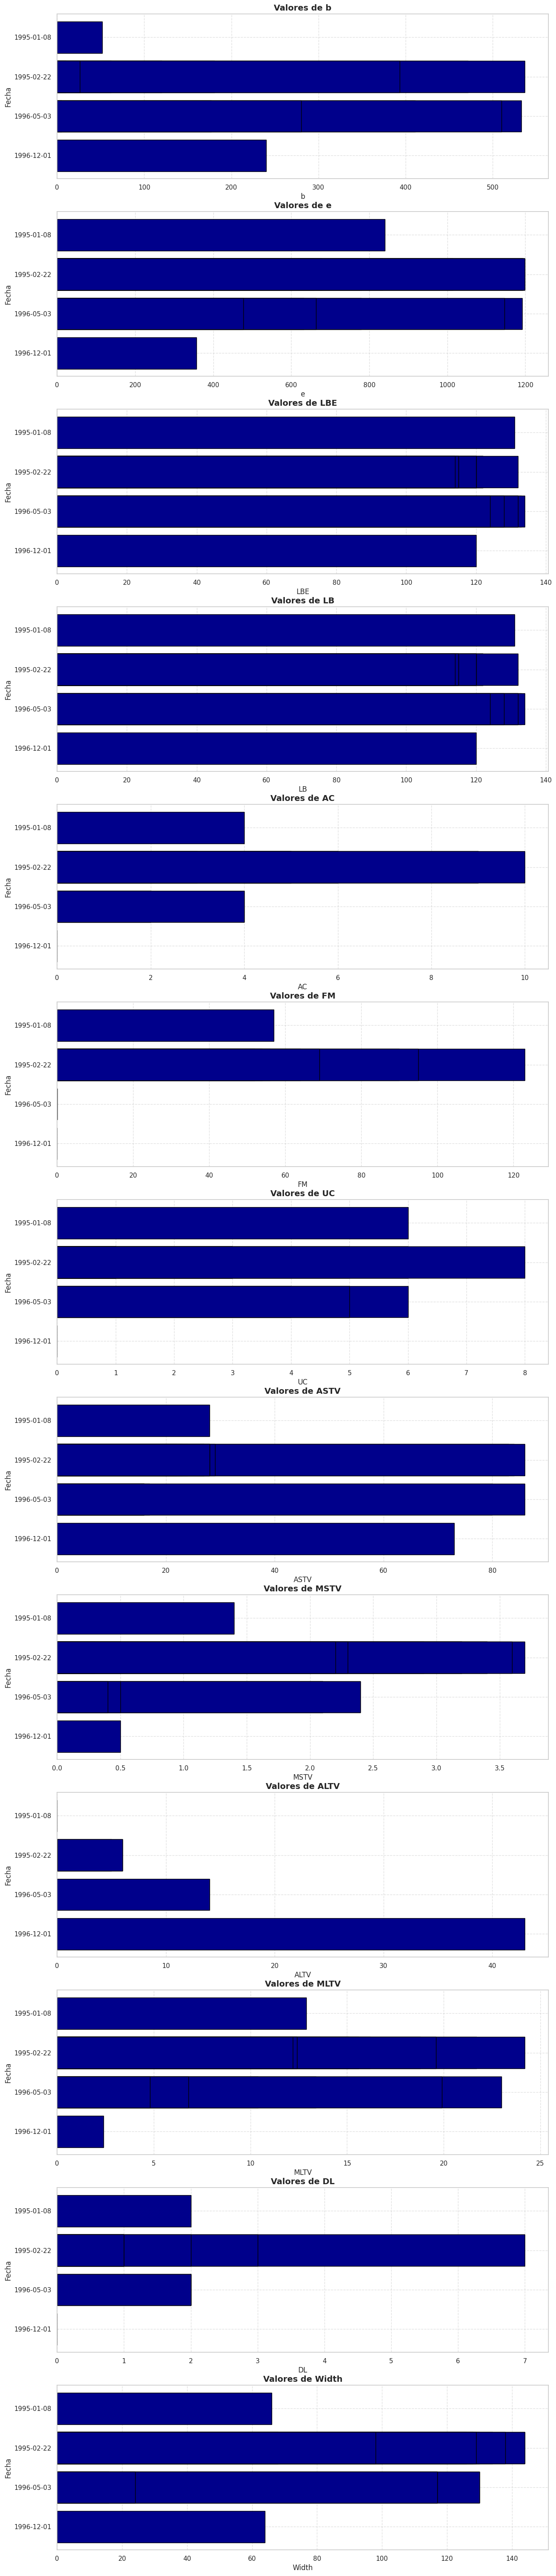

In [35]:
def barh_seaborn(data: pd.DataFrame, max_rows: int = 20) -> None:
    """
    Genera gráficos de barras horizontales (barh) para todas las columnas numéricas de un DataFrame.
    Usa la columna 'Date' como índice si está presente. Limita la cantidad de filas graficadas para claridad.

    Args:
        data (pd.DataFrame): DataFrame con columnas numéricas y posiblemente una columna 'Date'.
        max_rows (int): Número máximo de filas a mostrar por gráfico.

    Returns:
        None. Muestra las gráficas directamente.
    """
    sns.set(style='whitegrid')

    # Usar columna 'Date' como índice si existe
    if 'Date' in data.columns:
        data = data.copy()
        data['Date'] = pd.to_datetime(data['Date'])
        data.set_index('Date', inplace=True)

    n_cols = len(data.columns)
    height = max(3 * n_cols, 6)
    plt.figure(figsize=(15, height*2))

    for i, col in enumerate(data.columns):
        plt.subplot(n_cols, 1, i + 1)

        subset = data[col].head(max_rows)

        plt.barh(
            y=subset.index.strftime('%Y-%m-%d'),  # Formato de fecha legible
            width=subset,
            color='darkblue',
            edgecolor='black'
        )

        plt.title(f'Valores de {col}', fontsize=14, weight='bold')
        plt.xlabel(col)
        plt.ylabel('Fecha')
        plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

df_bar = df[['Date'] + var_continuas]
barh_seaborn(df_bar);

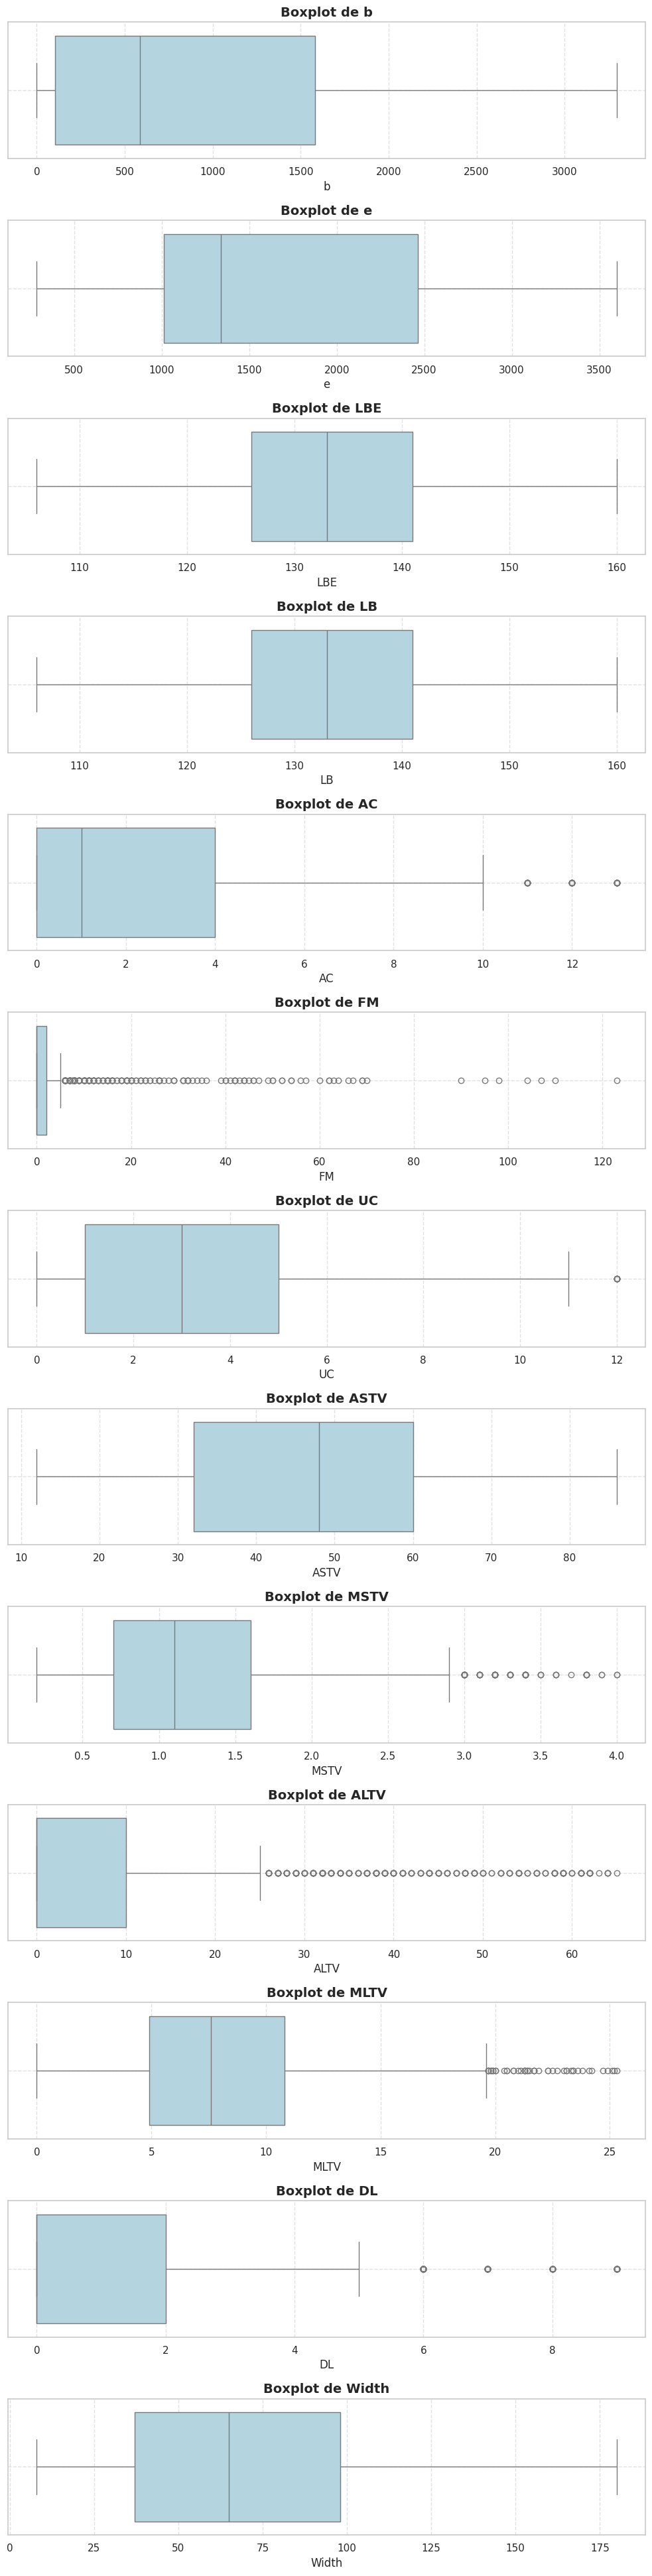

In [36]:
## Gráfica de cajas BOX
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def boxplot_seaborn(data: pd.DataFrame) -> None:
    """
    Genera gráficos de caja (boxplots) para todas las columnas numéricas de un DataFrame.

    Args:
        data (pd.DataFrame): DataFrame con columnas numéricas para graficar.

    Returns:
        None. Muestra las gráficas directamente.
    """
    sns.set(style='whitegrid')
    n_cols = len(data.columns)
    height = max(3 * n_cols, 6)
    plt.figure(figsize=(10, height))

    for i, col in enumerate(data.columns):
        plt.subplot(n_cols, 1, i + 1)
        sns.boxplot(x=data[col], color='lightblue')
        plt.title(f'Boxplot de {col}', fontsize=14, weight='bold')
        plt.xlabel(col)
        plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()
boxplot_seaborn(df[var_continuas])


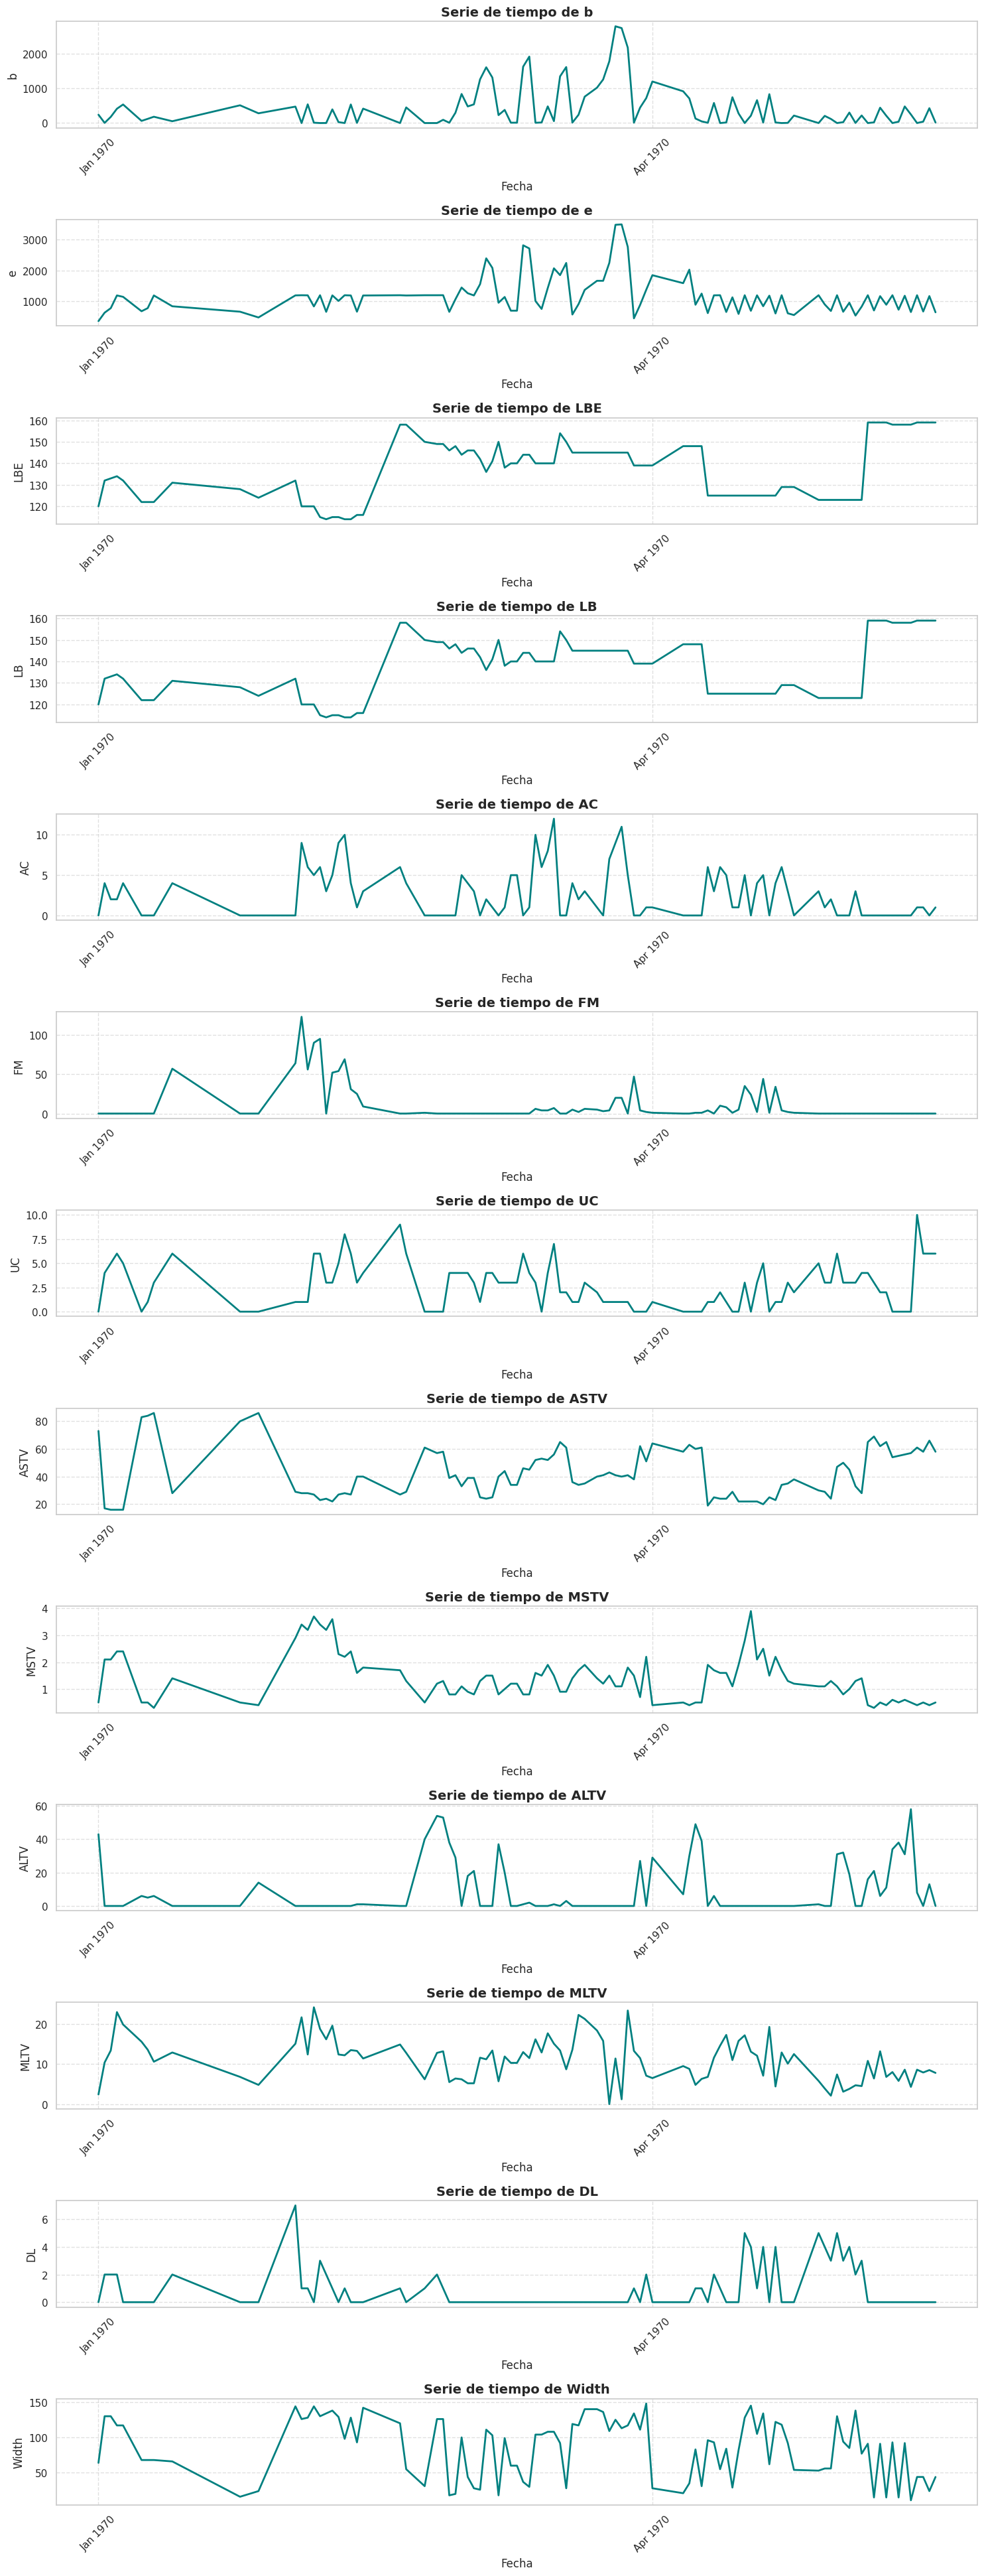

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

def lineplot_seaborn(data: pd.DataFrame, max_rows: int = 100) -> None:
    """
    Genera gráficos de líneas tipo serie de tiempo para todas las columnas numéricas de un DataFrame.
    Usa la columna 'Date' como índice si está presente. Limita la cantidad de filas graficadas para claridad.
    Muestra el eje X formateado por mes y año (ej. Ene 2020).

    Args:
        data (pd.DataFrame): DataFrame con una columna 'Date' y varias columnas numéricas.
        max_rows (int): Número máximo de filas (fechas) a mostrar por gráfico.

    Returns:
        None. Muestra las gráficas directamente.
    """
    sns.set(style='whitegrid')

    # Asegurar que 'Date' es índice si existe
    if 'Date' in data.columns:
        data = data.copy()
        data['Date'] = pd.to_datetime(data['Date'])
        data.set_index('Date', inplace=True)

    # Limitar filas
    data = data.sort_index().head(max_rows)

    n_cols = len(data.columns)
    height = max(3 * n_cols, 6)
    plt.figure(figsize=(15, height))

    for i, col in enumerate(data.columns):
        plt.subplot(n_cols, 1, i + 1)

        sns.lineplot(data=data, x=data.index, y=col, linewidth=2, color='teal')
        plt.title(f'Serie de tiempo de {col}', fontsize=14, weight='bold')
        plt.xlabel('Fecha')
        plt.ylabel(col)
        plt.grid(True, linestyle='--', alpha=0.6)

        # Mostrar mes y año en formato "Ene 2020"
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # cada 3 meses

        plt.xticks(rotation=45)  # inclinamos las etiquetas para mejor lectura

    plt.tight_layout()
    plt.show()
lineplot_seaborn(df[var_continuas])